In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras import optimizers
from keras import losses
from keras import metrics
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

# Загружаем датасет
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Нормализуем значения пикселей
x_train, x_test = x_train / 255., x_test / 255.

In [ ]:
model = Sequential([
    Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation="relu"),
    
    

    Flatten(),
    Dropout(0.5),
    Dense(64, activation="relu"),

    Dense(10, activation="softmax")
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_85 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_57 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_86 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_58 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_87 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_28 (Flatten)        (None, 576)             

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=256,
    validation_data=(x_val, y_val)
)

Epoch 1/20
196/196 [==============================] - 3s 12ms/step - loss: 0.8320 - accuracy: 0.6975 - val_loss: 0.4920 - val_accuracy: 0.8184
Epoch 2/20
196/196 [==============================] - 2s 11ms/step - loss: 0.4985 - accuracy: 0.8138 - val_loss: 0.4069 - val_accuracy: 0.8561
Epoch 3/20
196/196 [==============================] - 2s 11ms/step - loss: 0.4247 - accuracy: 0.8445 - val_loss: 0.3520 - val_accuracy: 0.8727
Epoch 4/20
196/196 [==============================] - 2s 10ms/step - loss: 0.3790 - accuracy: 0.8631 - val_loss: 0.3236 - val_accuracy: 0.8850
Epoch 5/20
196/196 [==============================] - 2s 11ms/step - loss: 0.3521 - accuracy: 0.8724 - val_loss: 0.3045 - val_accuracy: 0.8886
Epoch 6/20
196/196 [==============================] - 2s 11ms/step - loss: 0.3353 - accuracy: 0.8768 - val_loss: 0.2925 - val_accuracy: 0.8952
Epoch 7/20
196/196 [==============================] - 2s 11ms/step - loss: 0.3165 - accuracy: 0.8844 - val_loss: 0.2858 - val_accuracy: 0.8963

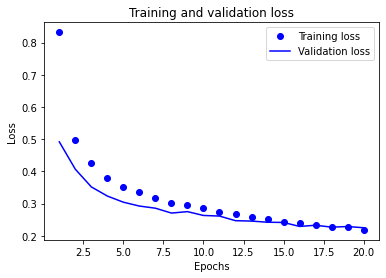

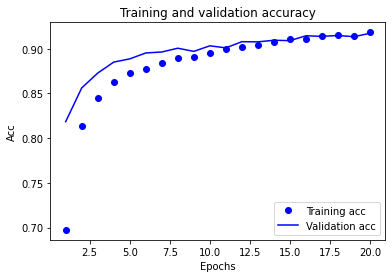

In [ ]:
history_dict = history.history

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, history_dict['loss'], 'bo', label='Training loss')
plt.plot(epochs, history_dict['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

313/313 - 1s - loss: 0.2436 - accuracy: 0.9101 - 658ms/epoch - 2ms/step


In [ ]:
result = model.predict(x_test)


In [ ]:
np.argmax(result[0])

9

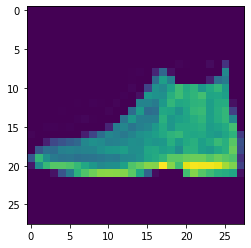

In [ ]:
plt.imshow(x_test[0])